##  Week 5: Modeling Distributions and PDFs

*  Student Name: Abraham Abate
*  Instructor: Cary Jim
*  DSC 530: Data Exploration and Analysis
*  Data Science Dept., BU
*  Date: 07/06/2024


In [33]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [34]:
# import Libraries
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
from empiricaldist import Cdf
from statsmodels.distributions.empirical_distribution import ECDF

import brfss
import thinkstats2
import thinkplot

## Excerise 5.1:
* In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

* In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [35]:
# read the data
brfs_df = brfss.ReadBrfss(nrows=None)
brfs_df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [36]:
# Create a boolean for men 
male = brfs_df[brfs_df.sex==1]

# select heights of men and NA values.
male_hts = male.htm3.dropna()

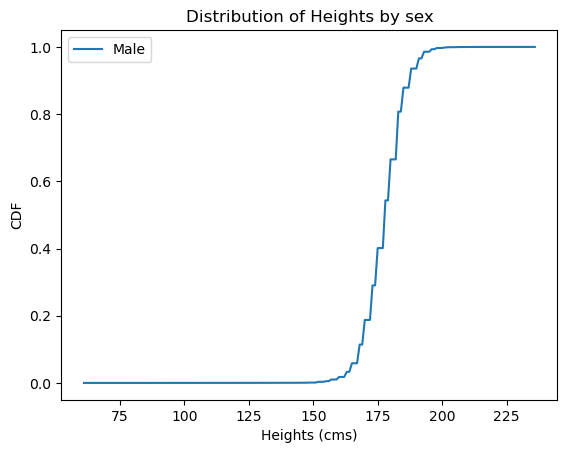

In [37]:
# Plot a CDF for each
cdf_male_hts = Cdf.from_seq(male_hts)
cdf_male_hts.plot(label='Male')

plt.xlabel('Heights (cms)') 
plt.ylabel('CDF')
plt.title('Distribution of Heights by sex')
plt.legend();

In [38]:
# Get the normal distribution with parameters: mean = 178 and Standard Deviation of 7.7
mu = 178
sigma = 7.7

dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [39]:
# Convert inches (5’10” and 6’1”) to cm
min_ht = ((5 * 12) + 10) * 2.54
max_ht = ((6 * 12) + 1) * 2.54

# converted heights
min_ht, max_ht

(177.8, 185.42000000000002)

In [40]:
# fraction of men under 5' 10"
low_range = dist.cdf(min_ht)  
low_range

0.48963902786483265

Interpretation:
* 48.96 %  of men are shorter than 5' 10" in height.

In [41]:
# fraction of men under 6' 1"
high_range = dist.cdf(max_ht)  
high_range

0.8323858654963072

Interpretation:
* 83.24 %  of men are shorter than 6' 1" in height.

In [42]:
# percentage of the U.S. male population is in this range.
# 5’10” and 6’1”
within_range_ht = high_range - low_range
print("Fraction of men within range :", within_range_ht)

Fraction of men within range : 0.34274683763147457


Answer: Within the US population for men approximately 34.27% of them would qualify to be in the Blue Man Group

## Excerise 5.2:
* To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

* Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

* `scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [43]:
# Pareto distribution of human height
alpha = 1.7
xmin = 1  # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist

In [44]:
# the mean height in Pareto world
dist_mean = dist.mean()
dist_mean

2.428571428571429

In [45]:
# fraction of people are shorter than the mean
cdf_dist = dist.cdf(dist_mean)
cdf_dist

0.778739697565288

##### Interpretation:
- About 77% of the people are shorter than 2.4 meters

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [46]:
# how many do we expect to be taller than 1 km?
num_people = (1 - dist.cdf(1000)) * 7e9
num_people

55602.976430479954

##### Interpretation:
- In Pareto world, about 55,603 people  would be taller than 1 km.

How tall do we expect the tallest person to be?

In [47]:
# Solution

# One way to solve this is to search for a height that we
# expect one person out of 7 billion to exceed.

# It comes in at roughly 600 kilometers.

dist.sf(600000) * 7e9


1.0525455861201714

In [48]:
# Solution

# Another way is to use `ppf`, which evaluates the "percent point function", which
# is the inverse CDF.  So we can compute the height in meters that corresponds to
# the probability (1 - 1/7e9).

dist.ppf(1 - 1 / 7e9)

618349.6106759505

In [49]:
# use `ppf` for inverse CDF to compute the corresponding height
heigth_meter = dist.ppf( 1 - 1 / 7e9)
print(f"Height in meters that corresponds to the prob : {heigth_meter}")

# search for a height that we expect one person out of 7 billion to exceed.
dist.sf(dist.ppf(1 - 1 / 7e9)) * 7e9

Height in meters that corresponds to the prob : 618349.6106759505


1.0000001937626732

## Exercises 6-1:
The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

 * Compute the median, mean, skewness and Pearson’s skewness of the resulting sample.  
 * What fraction of households reports a taxable income below the mean? 
 * How do the results depend on the assumed upper bound?

In [50]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [51]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

In [52]:
import hinc

# Read the data
hinc_df = hinc.ReadData()
hinc_df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


Text(0, 0.5, 'CDF')

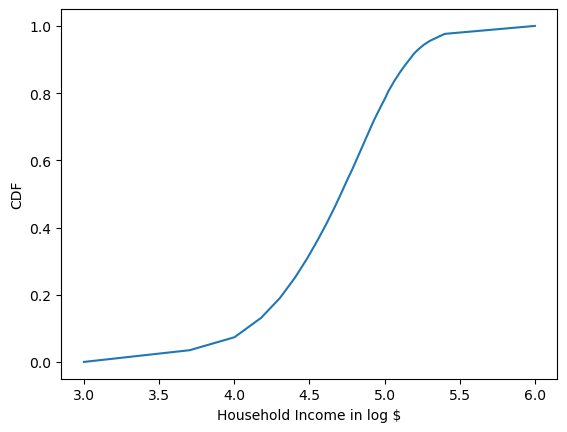

In [53]:
# Upper_log = 6 => represents the assumption that the largest income among the respondents is $1,000,000
log_sample = InterpolateSample(hinc_df, log_upper=6.0)
log_sample_cdf = Cdf.from_seq(log_sample)
log_sample_cdf.plot()
plt.xlabel('Household Income in log $')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

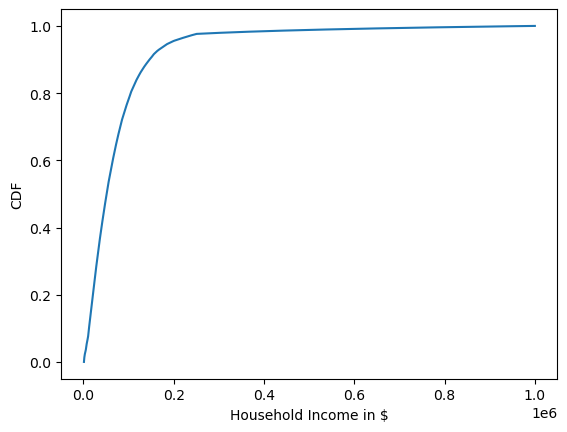

In [54]:
# empirical distribution of the sample
sample = np.power(10, log_sample)
sample_cdf = Cdf.from_seq(sample)
sample_cdf.plot()
plt.xlabel('Household Income in $')
plt.ylabel('CDF')



Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?



In [55]:
# Mean and Median income of the sample
mean_income = sample.mean()
median_income = np.median(sample)

# Print Mean and Median income 
print(f'The mean income is ${mean_income}')
print(f'The median income is ${median_income}')

The mean income is $74278.7075311872
The median income is $51226.93306562372


In [56]:
# Skewness of the sample
skewness = scipy.stats.skew(sample)
print(f'The skewness is {skewness}')

The skewness is 4.949920244429584


##### Interpretation:
- The result indicates hte income distribution is skewed to the right. Most of the values are concentrated on the left side of the mean.

In [57]:
# standard Deviation of the sample
income_var = np.var(sample)
income_stdDev = np.sqrt(income_var)
income_stdDev

93946.92996347835

In [58]:
# Pearson's skewness of the sample
income_pearson = 3 * (mean_income - median_income) / income_stdDev
print(f"The Pearson's skewness is {income_pearson}")

The Pearson's skewness is 0.7361105192428792


In [59]:
# Calculate the Empirical Distribution of the sample
sample_cdf(mean_income)
print(f'Probability that income less than the mean: {sample_cdf(mean_income)}')

Probability that income less than the mean: 0.660005879566872


#### Interpretation:
* The fraction of households reports a taxable income below the mean is 0.66. In other word, about 66% of the population makes less than the mean

How do the results depend on the assumed upper bound?

* Without better information about the top of this distribution, we can't say much about the skewness of the distribution.